# Project 3 - Reddit NLP
## 03-Exploratory Data Analysis

In this section, using the cleaned data, I will perform exploratory data analysis. For this stage, I will explore three main areas:
- Word count differences
- Sentiment analyzer using Vader
- Word Frequency

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./data/legal_nsq_clean.csv')

In [3]:
df.head(2)

,title,created_utc,selftext,subreddit,author,media_only,permalink,clean_text,clean_title,alltext_clean,alltext_word_count,title_word_count,selftext_word_count
0,My ex gf refuses to reclaim her items from my ...,1601524380,About a week ago I ended a moderately long rel...,legaladvice,Gtormund51,False,/r/legaladvice/comments/j31aqq/my_ex_gf_refuse...,About a week ago I ended a moderately long rel...,My ex gf refuses to reclaim her items from my ...,My ex gf refuses to reclaim her items from my ...,136,23,113
1,"A car is advertised for $18,000 lower than MSR...",1601524283,So I'm looking for a new car and I stumbled up...,legaladvice,hustlegoat,False,/r/legaladvice/comments/j319w1/a_car_is_advert...,So I'm looking for a new car and I stumbled up...,A car is advertised for 18 000 lower than MSRP...,A car is advertised for 18 000 lower than MSRP...,105,21,85


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55713 entries, 0 to 55712
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                55713 non-null  object
 1   created_utc          55713 non-null  int64 
 2   selftext             55713 non-null  object
 3   subreddit            55713 non-null  object
 4   author               55713 non-null  object
 5   media_only           55713 non-null  bool  
 6   permalink            55713 non-null  object
 7   clean_text           55713 non-null  object
 8   clean_title          55713 non-null  object
 9   alltext_clean        55713 non-null  object
 10  alltext_word_count   55713 non-null  int64 
 11  title_word_count     55713 non-null  int64 
 12  selftext_word_count  55713 non-null  int64 
dtypes: bool(1), int64(4), object(8)
memory usage: 5.2+ MB


### Exploring Word Count

In [27]:
df[['alltext_word_count', 'title_word_count']].describe().T

,count,mean,std,min,25%,50%,75%,max
alltext_word_count,55713.0,140.012959,174.090591,0.0,34.0,85.0,181.0,4957.0
title_word_count,55713.0,13.102220,8.775740,0.0,7.0,11.0,17.0,67.0


In [5]:
df.groupby('subreddit')['alltext_word_count', 'title_word_count'].describe()

alltext_word_count                                     \
                               count        mean         std  min   25%   
subreddit                                                                 
NoStupidQuestions            26987.0   55.225442   61.083882  0.0  18.0   
legaladvice                  28726.0  219.667653  205.370188  1.0  96.0   

                                        title_word_count                       \
                     50%    75%     max            count       mean       std   
subreddit                                                                       
NoStupidQuestions   37.0   71.0  1149.0          26987.0  13.953607  8.390779   
legaladvice        163.0  274.0  4957.0          28726.0  12.302374  9.050077   

                                               
                   min  25%   50%   75%   max  
subreddit                                      
NoStupidQuestions  0.0  8.0  12.0  17.0  64.0  
legaladvice        1.0  6.0  10.0  16.0  67.0

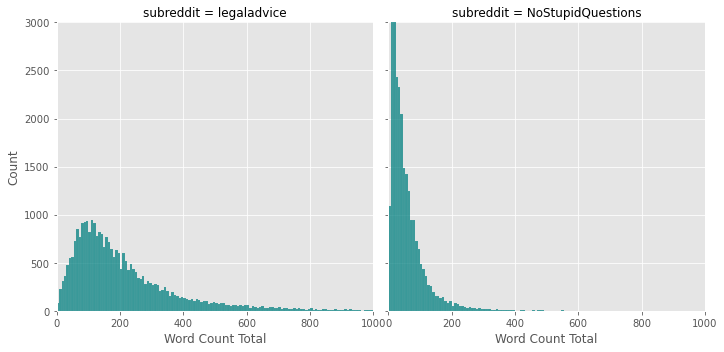

In [6]:
plt.style.use('ggplot')
g = sns.displot(data=df, x='alltext_word_count', col='subreddit', color='teal')
g.set(xlim=(0, 1000), ylim=(0, 3000));
g.set_axis_labels('Word Count Total', 'Count');

**Word Count Total:** The above graphs show the word count distribution for both subreddits. Legal Advice has a broader range in word counts and a much more smoothed curve. Here, 75% of the posts are below 274 words, with a max post length of 4957. No Stupid Questions submissions, on the other hand, are generally much shorter, with 75% of their posts below 71 words and an overall max of 1149 words. 

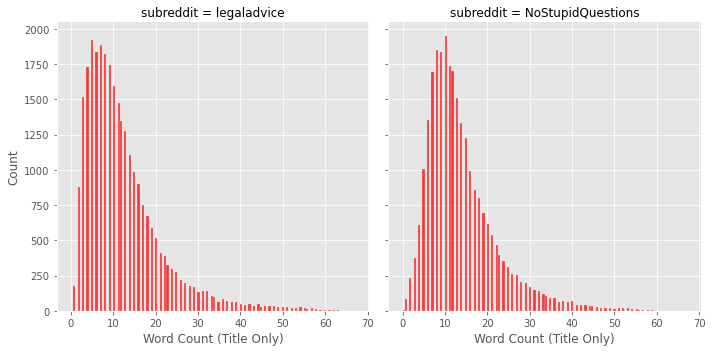

In [7]:
plt.style.use('ggplot')
g = sns.displot(data=df, x='title_word_count', col='subreddit', color='red')
g.set_axis_labels('Word Count (Title Only)', 'Count');

**Word Count - Title Only:** Here we see that the title length of each subreddit is virtually indistinguishable. The vast majority are under 20 words total, and the max word count is relatively similar for each: 67 for Legal Advice, 64 for No Stupid Questions.

### Sentiment Analysis

First I will instantiate the Sentiment Intensity Analyzer, and then I will create one dataframe for each subreddit so that they can easily be compared side by side. Then I will use some graphs to analyze the observed differences.

In [8]:
sia = SentimentIntensityAnalyzer()

In [9]:
results = []

for i in df[df['subreddit']=='legaladvice']['alltext_clean']:
    result = sia.polarity_scores(i)
    results.append(result)
    
la_scores = pd.DataFrame(results)
la_scores['subreddit'] = 'legaladvice'
la_scores.head(2)

,neg,neu,pos,compound,subreddit
0,0.031,0.869,0.100,0.7920,legaladvice
1,0.040,0.843,0.117,0.8367,legaladvice


In [10]:
results = []

for i in df[df['subreddit']=='NoStupidQuestions']['alltext_clean']:
    result = sia.polarity_scores(i)
    results.append(result)
    
nsq_scores = pd.DataFrame(results)
nsq_scores['subreddit'] = 'NoStupidQuestions'
nsq_scores.head(2)

,neg,neu,pos,compound,subreddit
0,0.059,0.941,0.000,-0.5267,NoStupidQuestions
1,0.099,0.687,0.214,0.9460,NoStupidQuestions


In [11]:
la_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
neg,28726.0,0.074862,0.054713,0.0000,0.0370,0.0670,0.1030,0.7440
neu,28726.0,0.855046,0.066481,0.1960,0.8180,0.8600,0.8990,1.0000
pos,28726.0,0.070096,0.046374,0.0000,0.0390,0.0650,0.0940,0.7370
compound,28726.0,-0.048382,0.739554,-0.9999,-0.8176,-0.1158,0.7351,0.9994


In [12]:
la_scores.head(2)

,neg,neu,pos,compound,subreddit
0,0.031,0.869,0.100,0.7920,legaladvice
1,0.040,0.843,0.117,0.8367,legaladvice


In [13]:
nsq_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
neg,26987.0,0.067182,0.085892,0.0000,0.0000,0.039,0.1080,0.676
neu,26987.0,0.852846,0.115530,0.0000,0.7800,0.860,0.9430,1.000
pos,26987.0,0.079938,0.086389,0.0000,0.0000,0.064,0.1270,0.773
compound,26987.0,0.069524,0.549200,-0.9984,-0.3506,0.000,0.5314,0.999


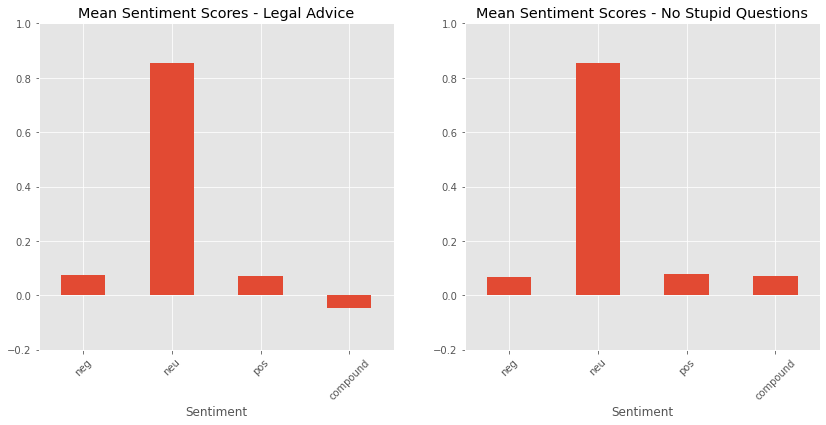

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6), sharey=True)

plt.subplot(1, 2, 1)
la_scores.mean().plot(kind='bar')
plt.title('Mean Sentiment Scores - Legal Advice')
plt.xlabel('Sentiment')
plt.ylim(-0.2, 1)
plt.xticks(rotation=45);

plt.subplot(1, 2, 2)
nsq_scores.mean().plot(kind='bar')
plt.title('Mean Sentiment Scores - No Stupid Questions')
plt.xlabel('Sentiment')
plt.ylim(-0.2, 1)
plt.xticks(rotation=45);

**Mean Sentiment Scores:** Here we can see that the distributions for Negative, Neutral, and Positve are relatively similar. There is a divergence in the compound value: Legal Advice has a negative compound score, while No Stupid Questions has a positive compound score.

In [18]:
cvect = CountVectorizer(stop_words='english')

In [21]:
la_df = df[df['subreddit']=='legaladvice']
la_to_vect = la_df['alltext_clean']
la_vect = cvect.fit_transform(la_to_vect)
la_vect_df = pd.DataFrame(la_vect.toarray(), columns=cvect.get_feature_names())

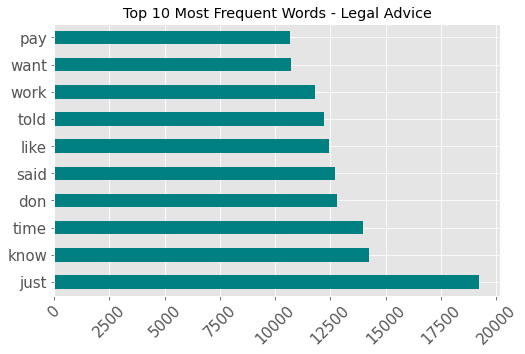

In [24]:
plt.subplots(figsize=(8,5))
la_vect_df.sum().nlargest(10).plot(kind='barh', color='teal', fontsize=15)
plt.title('Top 10 Most Frequent Words - Legal Advice');
plt.xticks(rotation=45);

In [23]:
nsq_df = df[df['subreddit']=='NoStupidQuestions']
nsq_to_vect = nsq_df['alltext_clean']
nsq_vect = cvect.fit_transform(nsq_to_vect)
nsq_vect_df = pd.DataFrame(nsq_vect.toarray(), columns=cvect.get_feature_names())

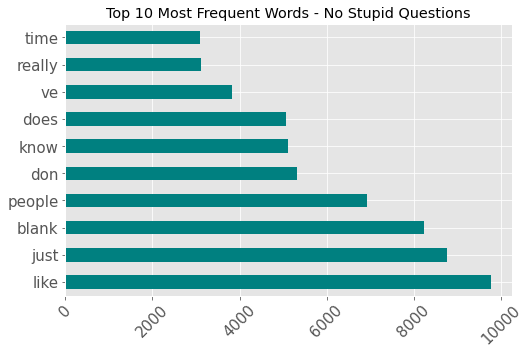

In [25]:
plt.subplots(figsize=(8,5))
nsq_vect_df.sum().nlargest(10).plot(kind='barh', color='teal', fontsize=15)
plt.title('Top 10 Most Frequent Words - No Stupid Questions');
plt.xticks(rotation=45);

**Word Frequency:** In the two plots above, we can see that these two subreddits have a few words in common: like, don (probably don’t), time, know, and just. There aren't many words that act as obvious separators between the two. It is notable that Legal Advice frequencies are quite a bit higher - top 10 words occur at least 10,000 times, but for No Stupid Questions there aren’t any words that appear over 10,000 times. This is likely affected by the overall word count from 2 slides ago.
